## Workshop 1: Linear Regression with Numpy<br>
### D. Staszak
### Fall 2019, Machine Learning and Predictive Analytics 



In [ ]:

import random

import matplotlib.pyplot as plt
import numpy as np

# Importing some of my preferred plotting settings
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['lines.linewidth'] = 3


### Generate a synthetic dataset so that we know the 'ground truth' distribution

We are going to generate a straight line with guassian noise.  To do this we'll use the np.random.randn() function. To generate random samples from a guassian distribution, $N(\mu, \sigma^2)$, use:

sigma * np.random.randn(...) + mu

In [ ]:

def straight_line_model(m, x, b):
    """
    Straight line model, returns mx+b
    m - (float) slope
    b - (float) y intercept
    x - (list) dependant variables
    """ 
    return m*x + b

m = 3.0 # slope/gradient
b = 2.0 # y-intercept
sigma = 1.5 # standard deviation

# Set the random number seed so that the experiment is reproducible
np.random.seed(100)
x = np.random.uniform(0, 10, 100)

# Add normal/Guassian noise to line
data = straight_line_model(m, x, b) + sigma*np.random.randn(x.size)


Let's visualize the the line and associated noise we've generated.  'Ground truth' is shown as the line. This is the underlying probabilistic distribution that we know the data follows.  The points are the data elements sampled from the ground truth (with noise)

In [ ]:
# Visualize the data
plt.figure(figsize=(8,6))
plt.scatter(x, data, color="black", s=100)
plt.plot(x, straight_line_model(m, x, b), color="green")
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.xlim(0,10);


## Define the functional form of GD

To generate the functions that implement gradient descent, we are going to divide the task into a few separate functions. Three functions

- runGradientDescent: Main control function that inputs the data, starting weight parameters, the learning rate, and the number of iterations to run
- calculateLoss: Function that takes as input the true and predicted y values and outputs the loss
- updateParameters: For each iteration of gradient descent, we call updateParameters to calculate the gradients and update the parameter values for a gradient descent 'step'.  Inputs are the current weight parameter values, the learning rate (to define step size), and the data

In class, we defined the gradients of the loss function as:
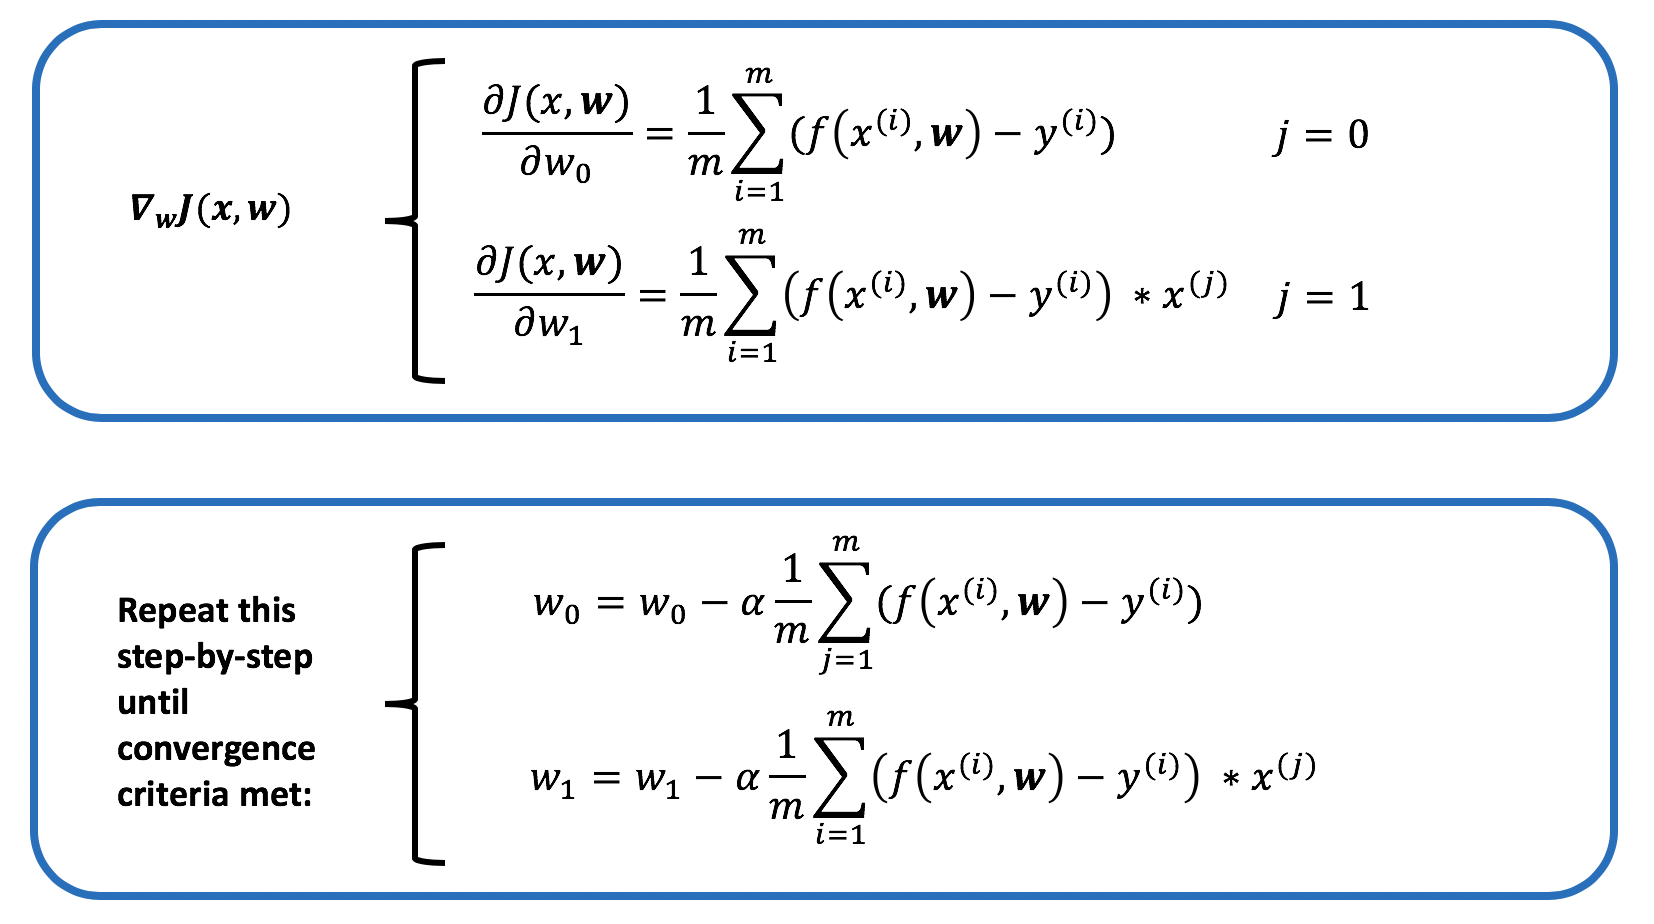

where i is the loop over the examples and j is the weight vector component. This can be performed via a loop, but also has a vectorized form if we add a column of '1's to the x matrix.  The vectorized version then takes the form 

$\nabla_{w}(J(x,w)) = {1\over{m}} \bf{x}^{T}(\bf{xw}-y)$.

Implement the gradient descent step in the updateParameters function below.

In [ ]:

def updateParameters(thesePars, x_examples, y_examples, alpha):
    
    m = len(x_examples)
    
    # FILL IN TWO CALCULATIONS HERE
    # 1) CALCULATE THE GRADIENTS (you can use the vectorized form or loop over them)
    # 2) CALCULATE THE UPDATED WEIGHT PARAMETERS
    # Hint, for vectorized treatment look at the numpy.dot function   
    
    dTheta = 
    thesePars = 
    
    return thesePars

def calculateLoss(y_pred, y_true):

    if len(y_pred) != len(y_true):
        print("Problem y_true != y_pred")
        return False
    
    # FILL IN THE LOSS CALCULATION HERE GIVEN THE TRUE AND PREDICTED Y VALUES    
    loss = 
    
    return loss
        
def runGradientDescent(X, Y, pars, nIterations, alpha):
   
    loss = []
    pars_history = []
    pars_history.append(pars.copy())

    # Save the initial loss     
    thisY = pars.dot(X.T)
    loss.append(calculateLoss(thisY, Y))
    
    for i in range(nIterations):
        pars = updateParameters(pars, X, Y, alpha)          
        thisY = pars.dot(X.T)
        loss.append(calculateLoss(thisY, Y))
        pars_history.append(pars.copy())
    
    return loss, pars, pars_history


In [ ]:

# Set some intial parameters
np.random.seed(109)
initialP = np.random.randn(2)
print("Starting parameters:", initialP)
alpha = 0.06
numIterations = 10

x_b = np.c_[np.ones((100, 1)), x]  # add x0 = 1 to each instance

# Run Gradient Descient
final_loss, final_pars, pars_history = runGradientDescent(x_b, data, initialP, numIterations, alpha)
print("Final parameters:", final_pars)



You should get a results about the same (assuming you have the same random seeds, alpha, and numIterations):
<br>Starting parameters: [-0.18773494  2.44063677]
<br>Final parameters: [0.2065863 2.9827143]

With the final parameters, we can now calculate our final model.

In [ ]:


# Output model
xModelOut = np.linspace(0,10,100)
yModelOut = final_pars[0] + xModelOut * final_pars[1]



In [ ]:

# Visualize the final outputted model
fig, ax = plt.subplots(2, 2, figsize=(16,12))
ax[0, 0].scatter(x, data, color="black", s=100)
ax[0, 0].plot(xModelOut, yModelOut, color="red")
ax[0, 0].set_xlim(0,10)
ax[0, 0].set_xlabel("x", fontsize=18)
ax[0, 0].set_ylabel("y", fontsize=18)

# Visualize the cost function as a function of iteration
x_loss = range(1, len(final_loss)+1)
ax[0, 1].plot(x_loss, final_loss, color="dodgerblue")
ax[0, 1].set_ylim(0.5,max(final_loss)*1.05)
ax[0, 1].set_xlabel("Iteration", fontsize=18)
ax[0, 1].set_ylabel("J(w)", fontsize=18);

# Visualize the residual (data - model prediction)
residuals = data-straight_line_model(final_pars[1], x, final_pars[0])
ax[1, 0].scatter(x, residuals, color="purple")
ax[1, 0].plot(xModelOut, [0. for i in xModelOut], linewidth=1., color="Black")
ax[1, 0].set_ylim(2.*min(residuals), 2.*max(residuals))
ax[1, 0].set_xlim(0, 10)
ax[1, 0].set_xlabel("x", fontsize=18)
ax[1, 0].set_ylabel("Residual", fontsize=18);


With 10 iterations, it is pretty clear that the model does not adequatly fit the data.  All three plots show evidence of this.  What about if we tried 1000 iterations?

In [ ]:

# Set some intial parameters
np.random.seed(109)
initialP = np.random.randn(2)
print("Starting parameters:", initialP)
alpha = 0.02
numIterations = 1000

x_b = np.c_[np.ones((100, 1)), x]  # add x0 = 1 to each instance

# Run Gradient Descient
final_loss, final_pars, pars_history = runGradientDescent(x_b, data, initialP, numIterations, alpha)
#print(pars_history)
print("Final parameters:", final_pars)

# Output model
xModelOut = np.linspace(0,10,100)
yModelOut = final_pars[0] + xModelOut * final_pars[1]


# Visualize the final outputted model
fig, ax = plt.subplots(2, 2, figsize=(16,12))
ax[0, 0].scatter(x, data, color="black", s=100)
ax[0, 0].plot(xModelOut, yModelOut, color="red")
ax[0, 0].set_xlim(0,10)
ax[0, 0].set_xlabel("x", fontsize=18)
ax[0, 0].set_ylabel("y", fontsize=18)

# Visualize the cost function as a function of iteration
x_loss = range(1, len(final_loss)+1)
ax[0, 1].plot(x_loss, final_loss, color="dodgerblue")
ax[0, 1].set_ylim(0.5,max(final_loss)*1.05)
ax[0, 1].set_xlabel("Iteration", fontsize=18)
ax[0, 1].set_ylabel("J(w)", fontsize=18);

# Visualize the residual (data - model prediction)
residuals = data-straight_line_model(final_pars[1], x, final_pars[0])
ax[1, 0].scatter(x, residuals, color="purple")
ax[1, 0].plot(xModelOut, [0. for i in xModelOut], linewidth=1., color="Black")
ax[1, 0].set_ylim(2.*min(residuals), 2.*max(residuals))
ax[1, 0].set_xlim(0, 10)
ax[1, 0].set_xlabel("x", fontsize=18)
ax[1, 0].set_ylabel("Residual", fontsize=18);



That looks much better.  We just didn't give gradient descent enough time to find the minima.





How does this compare with what we'd find with Sci-kit learn?


In [ ]:
from sklearn.linear_model import LinearRegression
### FILL IN LINEAR REGRESSION IMPLEMENTATION




## Let's visualize the 2D cost curve

To really understand the path to convergence, let's see if we can plot the full 2-dimensional cost function landscape.  This way we can picture how each of the steps brings us closer to the final solution.




In [ ]:

#Import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

w0_vals = np.arange(-1,3,0.05)
w1_vals = np.arange(1,5,0.05)
myxs, myys, myzs = [], [], []
for thisw0 in w0_vals:
    for thisw1 in w1_vals:
        myxs.append(thisw0)
        myys.append(thisw1)
        thisY = thisw0 + x * thisw1
        
        # FILL in the line below to calculate the loss of for the parameter values
        myzs.append(???)

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$w_0$', fontsize=20)
plt.ylabel(r'$w_1$', fontsize=20)
plt.title('Cost (Minimization Path Overlaid)', fontsize=20)

# We saved the parameter history in pars_history and the loss history in the (poorly called)
# list 'final_loss'.  Let's plot these values over the loss to visualize our path.

# FILL IN THE VALUES BELOW TO PLOT
# plt.plot(FILL IN XPAR_0, FILL IN XPAR_1, FILL IN LOSS VALUES, 'darkblue', linewidth=5)

ax.azim = 15



## The affect of varying the learning rate

Setting a proper learning rate can have a huge affect on the optimization results.  Set a value too low and it will take a long, long time to converge.  Set a value too high and the results become unstable.  The algorithm may never find the solution.

Let's visualize this with a few selected learning rates. First we have to adjust our earlier runGradientDescent function to plot the model result at each step of the algorithm.



In [ ]:
def runGradientDescent_withPlots(X, Y, pars, nIterations, alpha):
   
    loss = []
    pars_history = []
    pars_history.append(pars.copy())

    # Save the initial loss     
    thisY = pars.dot(X.T)
    loss.append(calculateLoss(thisY, Y))
    
    for i in range(nIterations):
        pars = updateParameters(pars, X, Y, alpha)          
        thisY = pars.dot(X.T)
        loss.append(calculateLoss(thisY, Y))
        pars_history.append(pars.copy())

        plt.plot(X[:,1], thisY, linewidth=1)
    
    return loss, pars, pars_history


In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

numIterations=10

plt.subplot(131); 
plt.scatter(x, data, marker='o', c="black", s=70)
final_loss, final_pars, pars_history = runGradientDescent_withPlots(x_b, data, initialP, numIterations, 0.001)
plt.subplot(132);
plt.scatter(x, data, marker='o', c="black", s=70)
final_loss, final_pars, pars_history = runGradientDescent_withPlots(x_b, data, initialP, numIterations, 0.06)
plt.subplot(133); 
plt.scatter(x, data, marker='o', c="black", s=70)
final_loss, final_pars, pars_history = runGradientDescent_withPlots(x_b, data, initialP, numIterations, 0.1)



What does this tell us?

- The left-most plot is with the smallest alpha.  It looks like it may converge, but is taking its' sweet time to do so.
- The right-most plot does not look like it will converge.  We picked an alpha that was too large.
- The middle plot looks about right.  The model is iterating substantially but sticking around the expected value.




## Stochastic Gradient Descent (SGB) and mini-Batch Gradient Descent

Gradient descent is a power optimization technique, but has some limitations that we discussed in lecture.  In particular, when we explore deep learning and systems with large training datasets and many free parameters, gradient descent can take a long time to converge.  One commonly used solution that we discussed in class was Stochastic Gradient Descent (SGB).  SGD becomes particularly important in situations like Deep Learning where you have a lot of data and many, many free parameters.  However, it is instructive for us to look at this for the simpler case of linear regression.  This way we can build some intuitions about how it works.

Standard (or Batch) GD calculates the loss and gradients for every training example in order to update the model weight parameters. Instead, SGD calculates the loss and gradients for each training example individually to update the model weight parameters (i.e. no sum over 'm' examples).  Mini-batch GD is somewhere in the middle.  The mini-batch size here is to calculate new weight parameters after a user-defined batch size (i.e. size=2:m-1).

In [ ]:


def updateParameters_SGD(thesePars, x_examples, y_examples, alpha_learning_schedule):
    
    m = len(x_examples)
    dTheta = x_examples.T.dot( x_examples.dot(thesePars) - y_examples )
    thesePars = thesePars - (alpha_learning_schedule/m) * dTheta    

    return thesePars


def runGradientDescent_SGD(X, Y, pars, alpha, n_epochs):
   
    loss = []    
    pars_history = []
    pars_history.append(pars.copy())

    m = len(X)
    
    for epoch in range(n_epochs):

        for i in range(m):

            # Here is where we randomly select a single index and capture the  
            # x,y values for that index
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = Y[random_index:random_index+1]
    
            alpha_learning_schedule = learning_schedule(epoch*m + 1)
            pars = updateParameters_SGD(pars, xi, yi, alpha_learning_schedule)        
            thisY = pars[0] + X * pars[1:]            
            loss.append(calculateLoss(thisY, Y))
            pars_history.append(pars.copy())
            if epoch==0 and i<10:
                plt.plot(X[:,1], thisY, linewidth=1, color="darkgreen")

    return loss, pars, pars_history


In [ ]:
n_epochs=20
t0, t1 = 5, 200

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(10222)
initialP = np.random.randn(2)

plt.figure(figsize=(8,6))
plt.scatter(x, data, marker='o', c="black", s=70)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)


# Run SGD
alpha=0.2
final_loss_sgd, final_pars_sgd, pars_history_sgd = \
    runGradientDescent_SGD(x_b, data, initialP, alpha, n_epochs)
print("Final parameters:", final_pars_sgd)



## Mini-batch implementation now

In [ ]:
def updateParameters_MB(thesePars, x_examples, y_examples, alpha_learning_schedule):
    
    m = len(x_examples)
    dTheta = x_examples.T.dot( x_examples.dot(thesePars) - y_examples )
    thesePars = thesePars - (alpha_learning_schedule/m) * dTheta    

    return thesePars


def runGradientDescent_MB(X, Y, pars, alpha, nIterations, miniBatchSize):
   
    loss = []    
    pars_history = []
    pars_history.append(pars.copy())

    m = len(X)
    
    for epoch in range(nIterations):

        # Shuffle the data so that you aren't accessing the same examples
        # in the same oder each iteration
        random_indices = np.random.permutation(m)
        xShuffled = X[random_indices]
        yShuffled = Y[random_indices]
        
        for i in range(0, m, miniBatchSize):    
            xi = xShuffled[i:i+miniBatchSize]
            yi = yShuffled[i:i+miniBatchSize]
            alpha_learning_schedule = learning_schedule(epoch*m + 1)
            
            pars = updateParameters_MB(pars, xi, yi, alpha_learning_schedule)        
            pars_history.append(pars.copy())

            thisY = pars[0] + X * pars[1:]            
            if epoch==0:
                plt.plot(X[:,1], thisY, linewidth=1, color="darkgreen")

            
            
    return loss, pars, pars_history


In [ ]:
nIterations = 100
miniBatchSize = 20
t0, t1 = 200, 4000

def learning_schedule(t):
    return t0 / (t + t1)

#np.random.seed(102223)
np.random.seed(1111)
initialP = np.random.randn(2)

plt.figure(figsize=(8,6))
plt.scatter(x, data, marker='o', c="black", s=70)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)

# Run MB
alpha=0.2
final_loss_mb, final_pars_mb, pars_history_mb = \
    runGradientDescent_MB(x_b, data, initialP, alpha, nIterations, miniBatchSize)
print("Final parameters:", final_pars_sgd)



## Now, let's compare the convergence of the 3 types of GD

In [ ]:
########################################################
# First rerun Batch GD so that we aren't using a crazy alpha
np.random.seed(109)
initialP = np.random.randn(2)
alpha = 0.02
numIterations = 1000

x_b = np.c_[np.ones((100, 1)), x]  # add x0 = 1 to each instance
# Run Gradient Descient
final_loss, final_pars, pars_history = runGradientDescent(x_b, data, initialP, numIterations, alpha)
########################################################


plt.figure(figsize=(8,6))
plt.plot([x[0] for x in pars_history_sgd], [x[1] for x in pars_history_sgd], color="orange", \
         label="SGD", marker='s')
plt.plot([x[0] for x in pars_history_mb], [x[1] for x in pars_history_mb], color="darkblue", \
         label="Mini-Batch", marker='+')
plt.plot([x[0] for x in pars_history], [x[1] for x in pars_history], color="black", label="Batch", marker='o')
plt.xlabel("$w_0$", fontsize=18)
plt.ylabel("$w_1$", fontsize=18)
plt.xlim(-0.5, 3)
plt.ylim(1,5)
plt.legend(fontsize=18)
